In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
file_path=r'C:\Users\phkya\Documents\GitHub\laptop_analysis\Laptop.csv'

laptop = pd.read_csv(file_path)


In [5]:
laptop.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [6]:
#data cleaning

del laptop['Unnamed: 0']

laptop.columns


Index(['Brand', 'Model', 'Series', 'Processor', 'Processor_Gen', 'RAM',
       'Hard_Disk_Capacity', 'OS', 'Rating', 'Price'],
      dtype='object')

In [7]:
laptop.shape[0]


130

In [8]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               130 non-null    object 
 1   Model               116 non-null    object 
 2   Series              80 non-null     object 
 3   Processor           123 non-null    object 
 4   Processor_Gen       123 non-null    object 
 5   RAM                 122 non-null    float64
 6   Hard_Disk_Capacity  122 non-null    object 
 7   OS                  122 non-null    object 
 8   Rating              130 non-null    float64
 9   Price               130 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 10.3+ KB


In [9]:
laptop.Brand.unique()

array(['DELL', 'ASUS', 'Lenovo', 'HP', 'acer', 'APPLE', 'MSI', 'realme',
       'MICROSOFT'], dtype=object)

In [10]:
laptop['Model']=laptop['Model'].str.lower()

In [11]:
laptop['Model'].unique()

array(['inspiron', 'vostro', 'vivobook', 'tuf', 'ryzen', 'ideapad', nan,
       'aspire', 'thinkpad', 'pavilion', '2020', 'gf63', 'rog', 'nitro',
       'asus', 'hp', 'book', 'katana', 'macbook', 'notebook',
       'chromebook', 'surface', 'envy', 'swift', 'zenbook', 'apu', '3000',
       '250-g6', 'travelmate', '15q', 'v15'], dtype=object)

In [12]:
laptop['Processor'].unique()
#laptop['Processor_Gen'].unique()

array(['i3', 'i5', '3250U', '3050U', '5600U', '-', '5500U', 'i7', '5300U',
       '5600H', '3450U', nan, '4800HS', '4600H', '4800H', 'R3-3250U',
       'AMD', 'A9'], dtype=object)

In [13]:
#creating a new column indication processor brand
laptop['Processor1']=laptop['Processor']

def processor_alter(p):
    if p == 'i3' or p== 'i5' or p=='i7': 
        p = 'Intel'
        
    elif p == '3250U' or p== '3050U' or p== '5600U' or p=='5500U' or p== '5300U' or p == '5600H' or p == '3450U' or p=='4800HS' or p== '4600H' or p== '4800H' or p=='R3-3250U':
        p = 'AMD'
        
    else: 
        p= 'Others'
        
    return p

laptop['Processor1'] = laptop['Processor1'].apply(processor_alter)
        
laptop = laptop.rename(columns = {'Processor1':'Processor_brand'})
#laptop.Processor = laptop['Model'].apply(lambda x: 'AMD' if x =='vivobook' or x =='ryzen' else 'Celeron')



In [14]:

#replace incorrect data 

laptop[(laptop.Processor == '-') & (laptop.Model == 'vivobook')] = laptop[(laptop.Processor == '-') & (laptop.Model == 'vivobook')].replace('-','Others')

laptop[(laptop.Processor == '-')]=laptop[(laptop.Processor == '-')].replace('-','Others')



In [15]:
laptop.groupby('OS').count()

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,Rating,Price,Processor_brand
OS,,,,,,,,,,
128 GB SSD,1,1,1,1,1,1,1,1,1,1
256 GB SSD,14,13,7,14,14,14,14,14,14,14
Chrome OS,2,2,2,2,2,2,2,2,2,2
DOS,5,5,2,5,5,5,5,5,5,5
Windows 10,10,8,2,10,10,10,10,10,10,10
Windows 10 Home,46,42,36,46,46,46,46,46,46,46
Windows 11 Home,44,37,22,44,44,44,44,44,44,44


In [16]:
laptop[laptop.OS.isin(['128 GB SSD','256 GB SSD'])]



,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price,Processor_brand
3,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440,Intel
38,ASUS,vivobook,15,i5,11th,8.0,1 TB HDD,256 GB SSD,4.3,52940,Intel
49,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,45340,Intel
59,acer,nitro,Ryzen,5600H,-,8.0,1 TB HDD,256 GB SSD,4.5,72940,AMD
63,HP,pavilion,Gaming,4800H,-,16.0,1 TB HDD,256 GB SSD,4.5,75940,AMD
65,ASUS,vivobook,K15,i5,11th,16.0,1 TB HDD,256 GB SSD,4.7,66940,Intel
71,ASUS,vivobook,K15,i5,11th,16.0,1 TB HDD,256 GB SSD,4.3,65940,Intel
80,DELL,inspiron,Ryzen,3450U,-,8.0,1 TB HDD,256 GB SSD,3.9,49240,AMD
92,DELL,vostro,NaN,i3,11th,4.0,1 TB HDD,256 GB SSD,4.1,43126,Intel
95,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.1,48940,Intel


In [17]:
#because the values in 'OS' with a hard disk format could be indicating that this device has a second hard disk installed
#we will create a column to represent that

laptop['2nd_hard_disk'] = laptop['OS']

laptop['2nd_hard_disk']=laptop['2nd_hard_disk'].replace(['Chrome OS','DOS','Windows 10','Windows 10 Home','Windows 11 Home'], np.NaN)

laptop.head()

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price,Processor_brand,2nd_hard_disk
0,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040,Intel,NaN
1,DELL,vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840,Intel,NaN
2,ASUS,vivobook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940,Intel,NaN
3,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440,Intel,256 GB SSD
4,ASUS,tuf,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940,Intel,NaN


In [18]:
#replace the incorrect value of 'acer swift 3' with correct values, because it was the only
#record with '128 GB SSD' for 'OS' (record 106)

laptop.OS= laptop.OS.replace(to_replace ='128 GB SSD', value = 'Windows 10')



In [19]:
#the OS for these devices could be either windows 10, windows 10 Home or windows 11 Home, except for one specific device 
#with 4GB RAM which cannot handle windows 11 Home. Hence, we will fill in random values of the three except for that device 

os_list = ['Windows 10 Home', 'Windows 11 Home', 'Windows 10']

def os_alter(OS):
    if OS == '256 GB SSD':
        OS = np.random.choice(os_list)
    return OS

laptop.OS= laptop['OS'].apply(os_alter)


In [20]:
#Correct Price data value
laptop.Price = laptop['Price']*0.01

In [21]:
#looking for any NA values in the 'OS' column

laptop[laptop.OS.isna()]

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price,Processor_brand,2nd_hard_disk
45,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.7,849.4,Others,NaN
70,DELL,vostro,Ryzen,R3-3250U,-,NaN,NaN,NaN,3.9,373.4,AMD,NaN
75,APPLE,macbook,Air,NaN,NaN,NaN,NaN,NaN,4.5,1199.4,Others,NaN
81,APPLE,macbook,Air,NaN,NaN,NaN,NaN,NaN,4.5,1059.4,Others,NaN
87,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.7,1109.4,Others,NaN
88,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.6,1299.9,Others,NaN
90,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.6,1299.9,Others,NaN
120,APPLE,macbook,Air,NaN,NaN,NaN,NaN,NaN,4.5,1199.4,Others,NaN


In [22]:
#the apple device will have 'MacOS' as its 'OS'
laptop.OS = laptop.OS.replace(np.nan, 'MacOS')
laptop[laptop.OS == 'MacOS']


#there is one DELL device that need adjustment, the index of it is 70
laptop[laptop.index == 70] = laptop[laptop.index == 70].replace('MacOS','Windows 10 Home')



In [23]:
#Exploratory Analysis

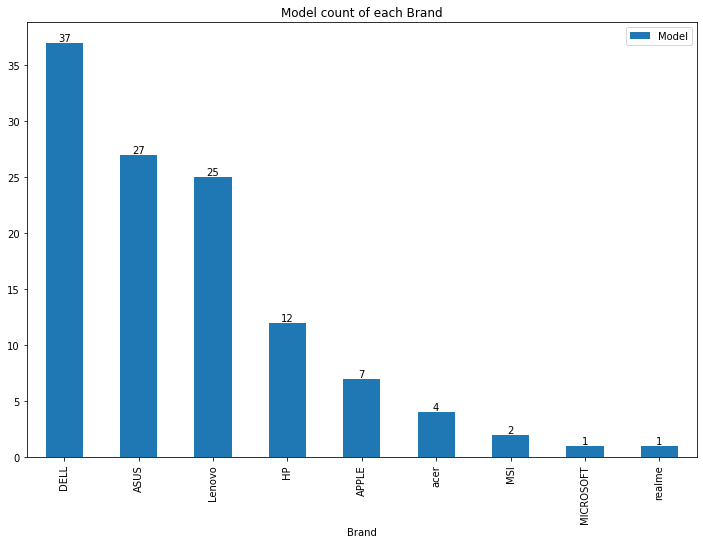

In [24]:
#create a sub dataframe for visualization - model count of each brand
brand_count=laptop.groupby('Brand')[['Model']].count()
brand_count=brand_count.sort_values('Model',ascending = False)

#import matplotlib to creat visualization
import matplotlib.pyplot as plt
%matplotlib inline

#visualization creating
viz1=brand_count.plot(kind='bar',figsize= (12,8))

#set graph title
plt.title('Model count of each Brand')

#set data lable for the graph 
viz1.bar_label(viz1.containers[0],label_type='edge');

#the top 3 most count brands were DELL, ASUS and Lenovo


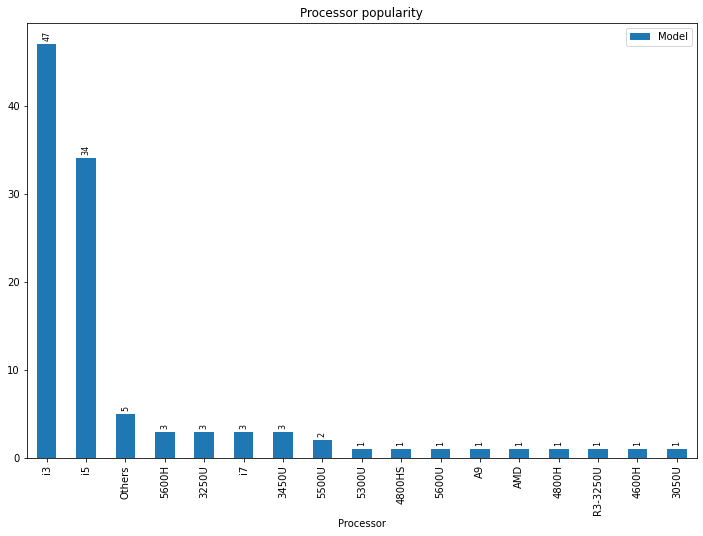

In [25]:
#create sub dataframe for visualization
processor_c = laptop.groupby('Processor')[['Model']].count()
processor_c = processor_c.sort_values('Model',ascending = False)

#create a bar graph
viz2=processor_c.plot(kind='bar', figsize=(12,8))

#setting graph title
plt.title('Processor popularity')

#creating data label for the graph
viz2.bar_label(viz2.containers[0], label_type='edge', color='black',rotation= 90, fontsize=8, padding = 3);


#the i3 and i5 cores took dominance among the laptops in the dataset


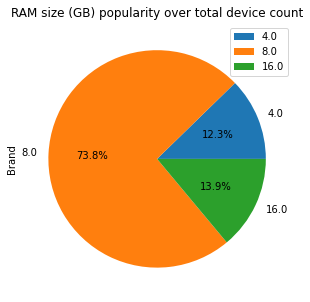

In [26]:
#pie chart for Ram size 
#sub dataframe for the pie chart 
ram_size = laptop.groupby('RAM')[['Brand']].count()

#pie chart creating 
ram_pie = ram_size.plot(kind='pie',y='Brand', figsize=(5,5),autopct='%.1f%%')

#set up chart's name
ram_pie=plt.title('RAM size (GB) popularity over total device count')


C:\Users\phkya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


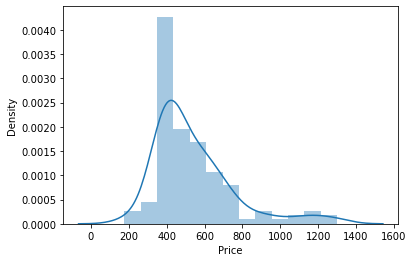

In [27]:
#My brother wants me to find him a laptop with good performance for his study and gaming with a budget below 1000$ from this data set. Now to find the attributes which would lead to a worthy choice of laptop
#we will have to figure out which is the most popular price appeared in the dataset to have a bigger possibility to find a good laptop
#if the said price is lower than the mean price (800$) we will accept it because or budget is below 1000$

import seaborn as sns
sns.distplot(laptop['Price'])
plt.show()

#Laptop price is skewed to the left side of the distribution. Laptop are sold most at the price of 400$, which is an affordable price

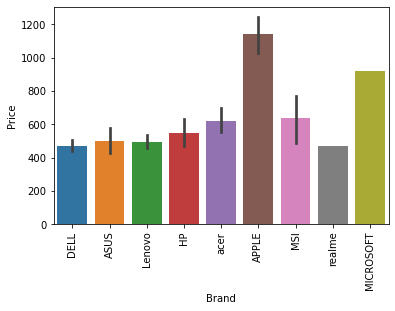

In [28]:
#Price vs Name brand
sns.barplot(x=laptop['Brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

#apple & microsoft has a very high average price, only apple goes above 1000$ price point
#so we will continue with the rest of the brand for our selection except for apple

<AxesSubplot:xlabel='Rating', ylabel='Price'>

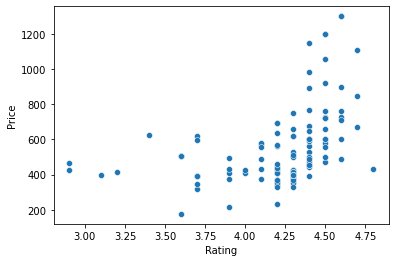

In [29]:
#does price varies in term of its rating 
sns.scatterplot(x=laptop['Rating'],y=laptop['Price'])

#the most dense rating group is around 4.00 to 4.625 of Rating and 300$ to 800$ in Price. This proves that
#price does not affect the rating . Instead, it will be more informative if we study this sample size of Price range
#to find the best latop 

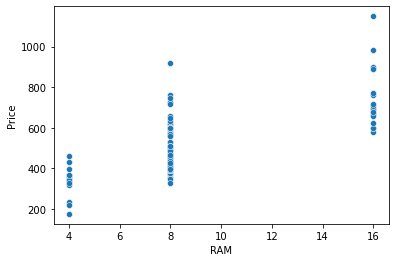

In [30]:
#does Ram size determine the Price ?
sns.scatterplot(x=laptop['RAM'], y=laptop['Price']);

#Yes, the higher the RAM size the more expensive. Since we also put performance into consideration
#we will look into devices with 8GB or above


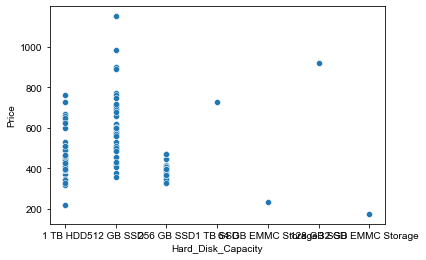

In [31]:
#does Hard disk size has impact on the Price ?
sns.scatterplot(x=laptop['Hard_Disk_Capacity'], y=laptop['Price']);
sns.set(rc={'figure.figsize':(11.7,16)})

#No, the hard disk capacity does not have an critical impact on the price of the laptop.Most of the population lies on 1TB HDD, 512GB SSD, 256GB SSD. Since having an SSD would be better nowadays
#we will select 512 GB SSD as our favorable attribute since we value performance of the device

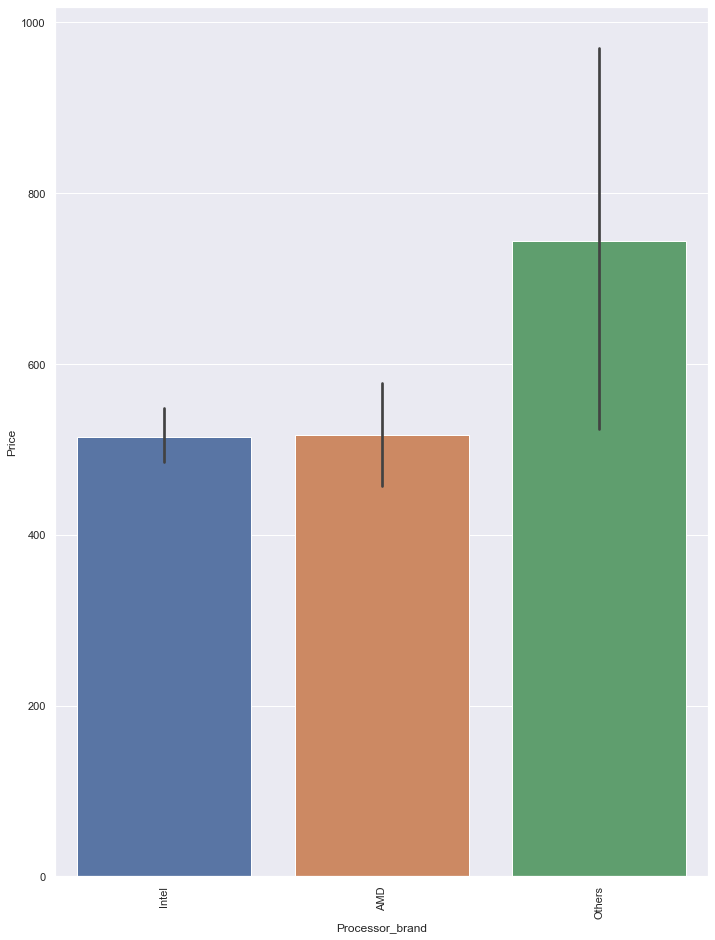

In [32]:
#does Processor brand determine Price ? 
sns.barplot(x=laptop['Processor_brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

#AMD and Intel has the same price range while Intel has a more narrow distribution over the price range. So device with 
#Intel chip will usually come with an affordable price

In [33]:
#in sum, we have narrow down our selected attribute to find the best laptop for my brother
#the select population of laptop for further review is Intel chip, 512 GB SSD, is from any 
#brand except for Apple, has RAM size above 8GB and has rating above 4.0

In [34]:
ideal_laptop=laptop[(laptop.Processor_brand == 'Intel')&
                    (laptop.Price < 1000)&
                    (laptop.Hard_Disk_Capacity == '512 GB SSD')&
                    (laptop.Brand !='Apple')&
                    (laptop.RAM > 8.0)
                      & (laptop.Rating > 4.0)]
ideal_laptop

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price,Processor_brand,2nd_hard_disk
7,DELL,inspiron,NaN,i5,11th,16.0,512 GB SSD,Windows 10,4.2,690.4,Intel,NaN
26,ASUS,vivobook,15,i7,10th,16.0,512 GB SSD,Windows 11 Home,4.1,579.4,Intel,NaN
34,Lenovo,ideapad,Slim,i5,11th,16.0,512 GB SSD,Windows 10 Home,4.4,599.4,Intel,NaN
41,DELL,inspiron,NaN,i5,11th,16.0,512 GB SSD,Windows 10,4.2,690.4,Intel,NaN
66,ASUS,tuf,Gaming,i5,11th,16.0,512 GB SSD,Windows 10 Home,4.6,899.4,Intel,NaN
68,MSI,katana,GF66,i5,11th,16.0,512 GB SSD,Windows 10 Home,4.4,769.4,Intel,NaN
74,DELL,NaN,NaN,i7,11th,16.0,512 GB SSD,Windows 11 Home,4.4,889.4,Intel,NaN
77,Lenovo,ideapad,Slim,i5,11th,16.0,512 GB SSD,Windows 10 Home,4.4,599.4,Intel,NaN
83,DELL,inspiron,NaN,i5,11th,16.0,512 GB SSD,Windows 10,4.4,677.4,Intel,NaN
93,Lenovo,ideapad,5,i5,11th,16.0,512 GB SSD,Windows 10 Home,4.6,709.4,Intel,NaN


In [35]:
#we will calculate the cost efficient ratio among these ideal laptop to find the perfect laptop
#for my brother by calculating Price/Rating

ideal_laptop['CE_ratio']=ideal_laptop['Price']/ideal_laptop['Rating']

#the laptop to buy is:
ideal_laptop.sort_values('CE_ratio',ascending = False).head(1)

C:\Users\phkya\AppData\Local\Temp/ipykernel_12880/318541052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideal_laptop['CE_ratio']=ideal_laptop['Price']/ideal_laptop['Rating']


,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price,Processor_brand,2nd_hard_disk,CE_ratio
97,HP,pavilion,Gaming,i7,11th,16.0,512 GB SSD,Windows 10 Home,4.4,981.4,Intel,NaN,223.045455
